<a href="https://colab.research.google.com/github/Cilphanus/Cilphanus/blob/main/Decision%20trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (569, 30)

First 5 rows of dataset:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst ra

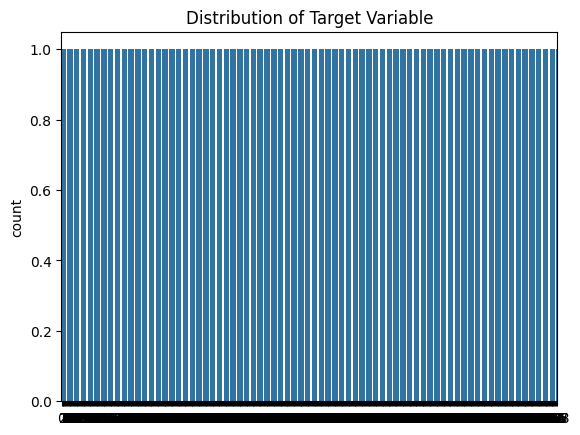

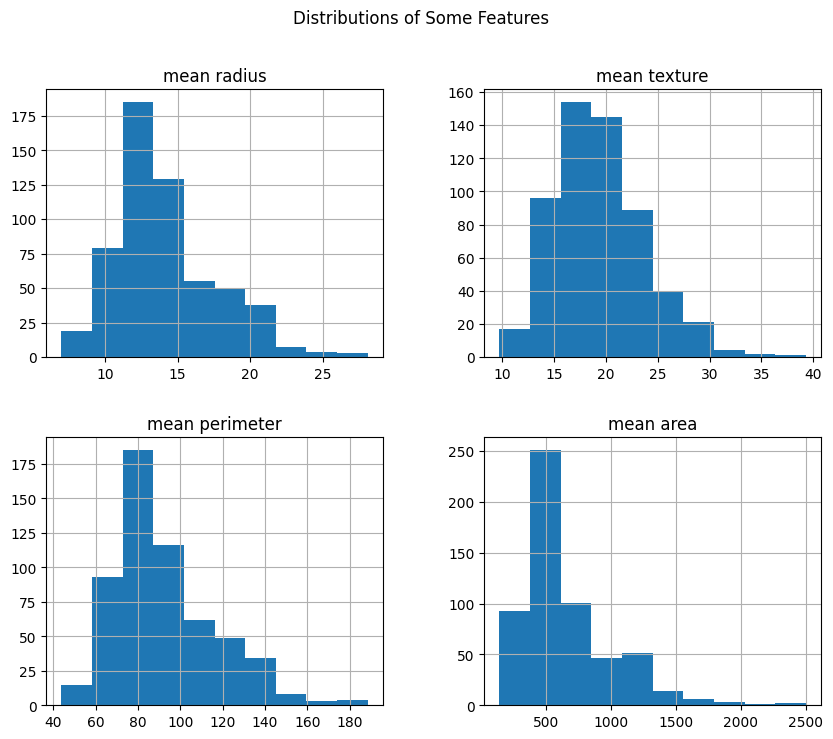

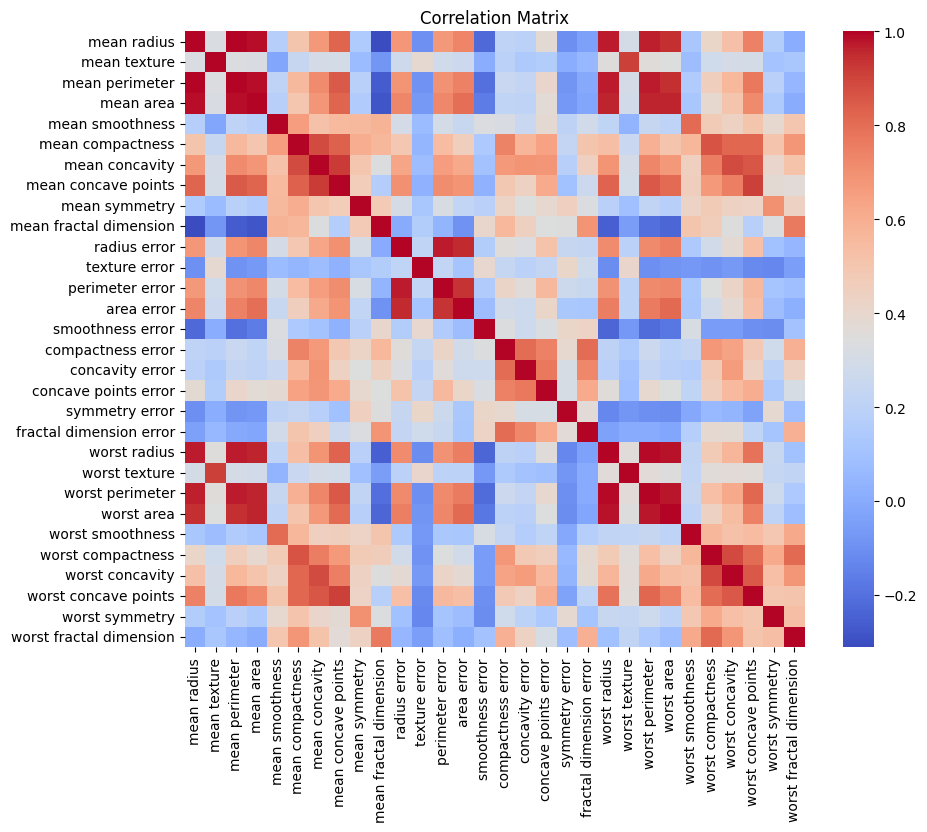

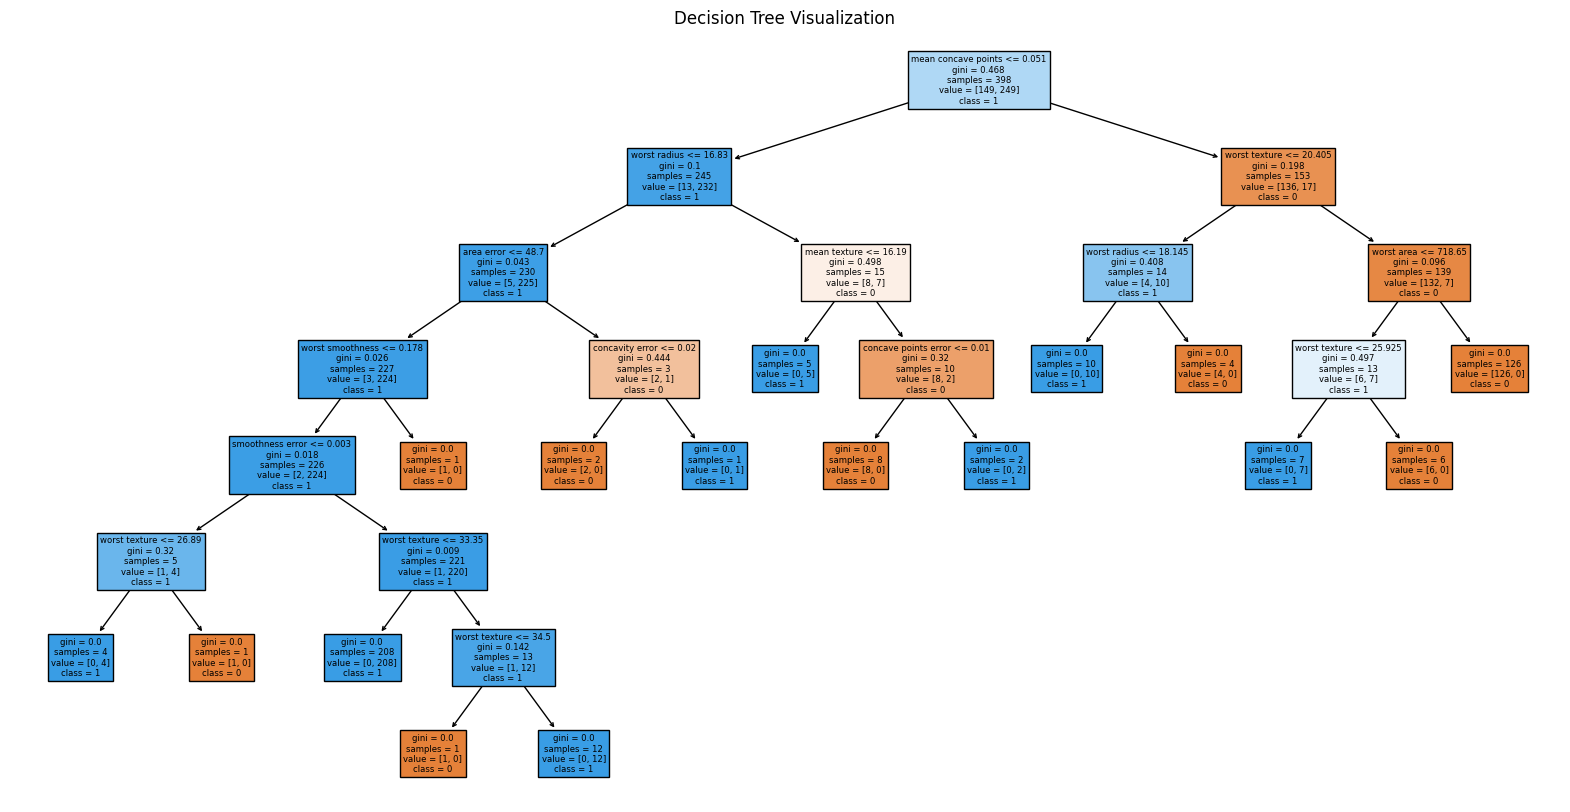


Confusion Matrix:
 [[ 60   3]
 [  7 101]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [2]:
#!/usr/bin/env python
# coding: utf-8

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Basic Information
print("Dataset Shape:", X.shape)
print("\nFirst 5 rows of dataset:\n", X.head())
print("\nStatistics of the dataset:\n", X.describe())

# Check for missing values
if X.isnull().sum().sum() == 0:
    print("\nNo missing values in the dataset.")
else:
    print("\nMissing values in dataset:\n", X.isnull().sum())

# Visualize the distribution of target variable
sns.countplot(y)
plt.title("Distribution of Target Variable")
plt.show()

# Visualize distributions of some selected features
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
X[features_to_plot].hist(figsize=(10, 8))
plt.suptitle("Distributions of Some Features")
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Make predictions and evaluate the model
predictions = dt_model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
